try different samples of data for the train test split settings 

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# transformations
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
score_dict = {}
def score_me(mn, mc, pn, y_test):
    """ 
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn, average='weighted'), 4)
    score_dict[mn] = model_name 
    print(classification_report(y_test, pn), '\n', '\n')
    
    plt.figure(figsize = (20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn) +' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


In [3]:

def Decision_Tree(X_train, y_train, X_test, y_test):
    global dctc
    dctc_start = time.time()
    dctc= DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
    dctc_predictions = dctc.predict(X_test)
    score_me('Decision Tree Classifier', dctc, dctc_predictions, y_test)

    dctc_end = time.time()
    compute_time_dctc = dctc_end - dctc_start
    model_name['Run Time(secs)'] = round(compute_time_dctc, 3)
    print('Decision Tree Classifier Scores:', score_dict['Decision Tree Classifier'])


In [4]:
def RF_Feature_Importance(X_train, y_train, X_test, y_test):    
    rfc_feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns,
                                         columns = ['Importance']).sort_values('Importance', ascending = False)
    plt.figure(figsize = (20, 8))
    sns.barplot(x = 'Importance', y = rfc_feature_importances.index,
            data = rfc_feature_importances)
    plt.title('Random Forest Classifier Feature Importances', fontsize = 14)
    plt.xlabel('Importance Value', fontsize = 12)
    plt.show()
    
    

def Feature_Optimization_RF(X_train, y_train, X_test, y_test ):
    results = pd.DataFrame(columns = ['Number of Features', 'Accuracy Score','Micro F1 Score','Macro F1 Score', 'Weighted F1 Score', 'Micro Precision Score', 'Macro Precision Score', 
                                     'Weighted Precision Score', 'Micro Recall Score', 'Macro Recall Score', 'Weighted Recall Score'])


    for index in np.arange(len(X_train.columns)):
        sel = RFE(RandomForestClassifier(random_state = 42, n_jobs = -1), n_features_to_select = index + 1)
        sel.fit(X_train, y_train)
        x_train_rfe = sel.transform(X_train)
        x_test_rfe = sel.transform(X_test)
        model = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs = -1)
        model.fit(x_train_rfe, y_train)
        results.loc[index] = [index + 1,
                              round(accuracy_score(y_test, model.predict(x_test_rfe)), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='weighted'), 4)]
        return results 




In [5]:

def Random_Forest(X_train, y_train, X_test, y_test):
    global rfc
    '''returns rf_results dataframe which must be saved '''
    rfc_start = time.time()
    rfc = RandomForestClassifier(n_estimators=100, random_state = 42, n_jobs = -1).fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    score_me('Random Forest Classifier', rfc, rfc_predictions, y_test)

    rfc_end = time.time()
    compute_time_rfc = rfc_end - rfc_start
    model_name['Run Time(secs)'] = round(compute_time_rfc, 3)
    print('Random Forest Classifier Scores:', score_dict['Random Forest Classifier'])
    

In [6]:
def Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test):
    global gbc
    gbc_start = time.time()


    gbc = GradientBoostingClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)

    gbc_predictions = gbc.predict(X_test)
    score_me('Gradient Boosting Classifier', gbc, gbc_predictions, y_test)

    gbc_end = time.time()
    compute_time_gbc = gbc_end - gbc_start
    model_name['Run Time(secs)'] = round(compute_time_gbc, 3)
    print('Gradient Boosting Classifier Scores:', score_dict['Gradient Boosting Classifier'])


In [7]:
def XG_Boost_Classifier(X_train, y_train, X_test, y_test):
    global xgc
    xgc_start = time.time()


    xgc = OneVsRestClassifier(XGBClassifier()).fit(X_train, y_train)

    xgc_predictions = xgc.predict(X_test)
    score_me('XG-Boost Classifier', xgc, xgc_predictions, y_test)

    xgc_end = time.time()
    compute_time_xgc = xgc_end - xgc_start
    model_name['Run Time(secs)'] = round(compute_time_xgc, 3)
    print('XG-Boost Classifier Scores:', score_dict['XG-Boost Classifier'])


In [8]:
def KNN_Classifier(X_train, y_train, X_test, y_test):
    global knnc
    knn_start = time.time()
    
    knnc = KNeighborsClassifier(n_neighbors=7, n_jobs = -1).fit(X_train, y_train)
    knn_predictions = knnc.predict(X_test)
    score_me('K-Neighbors Classifier', knnc, knn_predictions, y_test)

    knn_end = time.time()
    compute_time_knn = knn_end - knn_start
    model_name['Run Time(secs)'] = round(compute_time_knn, 3)
    print('K-Neighbors Classifier Scores:', score_dict['K-Neighbors Classifier'])


In [9]:
def train_models(df, target_column, RF_O=False):
    X_train, X_test, y_train, y_test = train_test_split(df, target_column, random_state=42, test_size=0.25)
    
    Decision_Tree(X_train, y_train, X_test, y_test)
    
    Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test)
    
    XG_Boost_Classifier(X_train, y_train, X_test, y_test)
    
    KNN_Classifier(X_train, y_train, X_test, y_test)
    Random_Forest(X_train, y_train, X_test, y_test)
    
    # shows a bar chart of feature importance
    RF_Feature_Importance(X_train, y_train, X_test, y_test )
    # returns a dataframe of how features affect the performance of the RF model 
    results = Feature_Optimization_RF(X_train, y_train, X_test, y_test )
    
    return pd.DataFrame.from_dict(score_dict) 
    

In [10]:
score_dict_test_df = {}
def score_me_test_df(mn_t, mc_t, pn_t, y_test):
    """ 
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name_ts
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn_t), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn_t, average='weighted'), 4)
    score_dict_test_df[mn_t] = model_name 
    print(classification_report(y_test, pn_t), '\n', '\n')
    
    plt.figure(figsize = (20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn_t)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn_t) +' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


In [11]:
def run_test_df(the_target_column, the_test_data):
    target_column = the_target_column
    set_to_test = the_test_data
    model_names = {'Decision Tree Classifier':[dctc, dctc.predict(set_to_test)],'Random Forest Classifier':[rfc, rfc.predict(set_to_test)],
                   'Gradient Boosting Classifier':[gbc, gbc.predict(set_to_test)],'XG-Boost Classifier':[xgc, xgc.predict(set_to_test)],
                   'K-Neighbors Classifier':[knnc, knnc.predict(set_to_test)]}
    for models in model_names:
        score_me_test_df(mn_t=models, mc_t=model_names[models][0], pn_t=model_names[models][1], y_test=the_target_column)

    model_results_ts = pd.DataFrame.from_dict(score_dict_test_df)
    return model_results_ts


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      9801
           1       0.91      0.94      0.92      9710
           2       0.97      0.99      0.98      9795
           3       0.99      0.99      0.99      9719
           4       0.99      1.00      0.99      9906
           5       0.87      0.83      0.85      9940
           6       0.78      0.76      0.77      9879

    accuracy                           0.90     68750
   macro avg       0.90      0.90      0.90     68750
weighted avg       0.90      0.90      0.90     68750
 
 



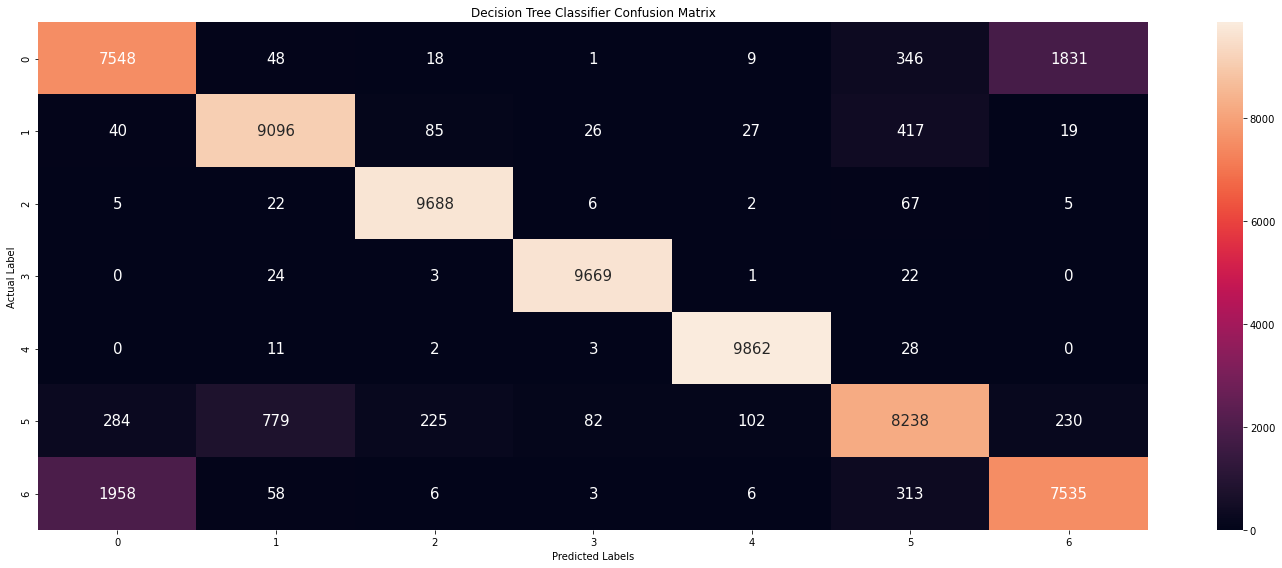

Decision Tree Classifier Scores: {'Accuracy Score': 0.8965, 'Micro F1 Score': 0.8965, 'Macro F1 Score': 0.8961, 'Weighted F1 Score': 0.8958, 'Micro Precision Score': 0.8965, 'Macro Precision Score': 0.8956, 'Weighted Precision Score': 0.8955, 'Micro Recall Score': 0.8965, 'Macro Recall Score': 0.8968, 'Weighted Recall Score': 0.8965, 'Run Time(secs)': 2.495}
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      9801
           1       0.33      0.33      0.33      9710
           2       0.43      0.32      0.37      9795
           3       0.46      0.59      0.52      9719
           4       0.48      0.64      0.55      9906
           5       0.42      0.21      0.28      9940
           6       0.80      0.58      0.67      9879

    accuracy                           0.51     68750
   macro avg       0.51      0.51      0.50     68750
weighted avg       0.51      0.51      0.50     68750
 
 



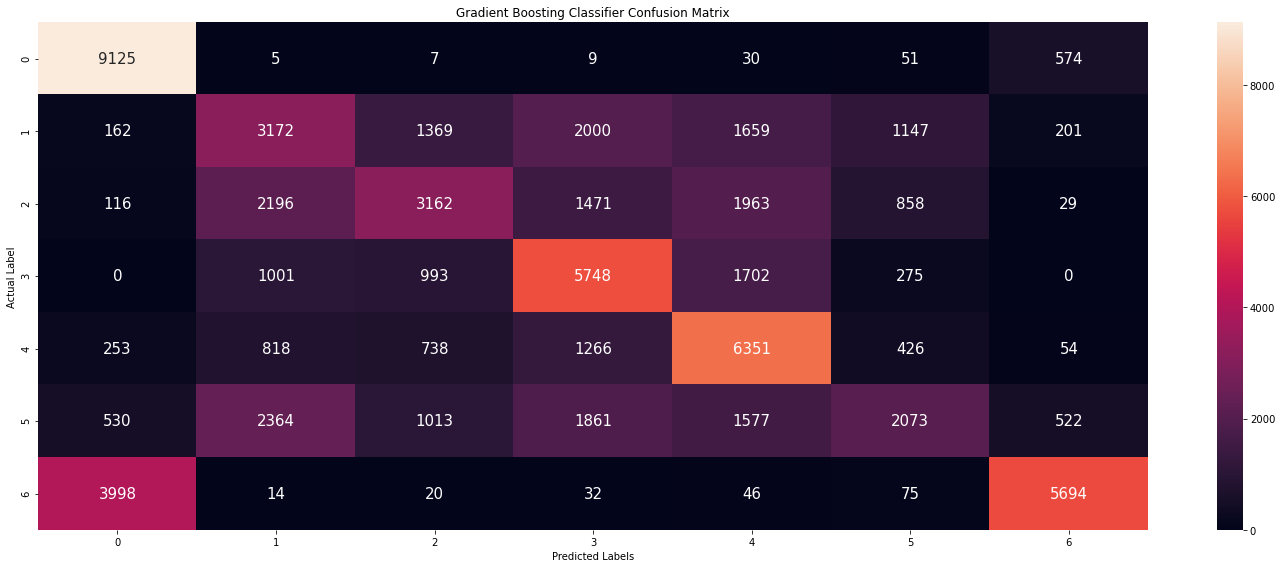

Gradient Boosting Classifier Scores: {'Accuracy Score': 0.5138, 'Micro F1 Score': 0.5138, 'Macro F1 Score': 0.4968, 'Weighted F1 Score': 0.4968, 'Micro Precision Score': 0.5138, 'Macro Precision Score': 0.5108, 'Weighted Precision Score': 0.5112, 'Micro Recall Score': 0.5138, 'Macro Recall Score': 0.514, 'Weighted Recall Score': 0.5138, 'Run Time(secs)': 23.375}
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      9801
           1       0.90      0.90      0.90      9710
           2       0.95      0.99      0.97      9795
           3       0.98      1.00      0.99      9719
           4       0.99      1.00      0.99      9906
           5       0.89      0.82      0.85      9940
           6       0.85      0.82      0.84      9879

    accuracy                           0.91     68750
   macro avg       0.91      0.91      0.91     68750
weighted avg       0.91      0.91      0.91     68750
 
 



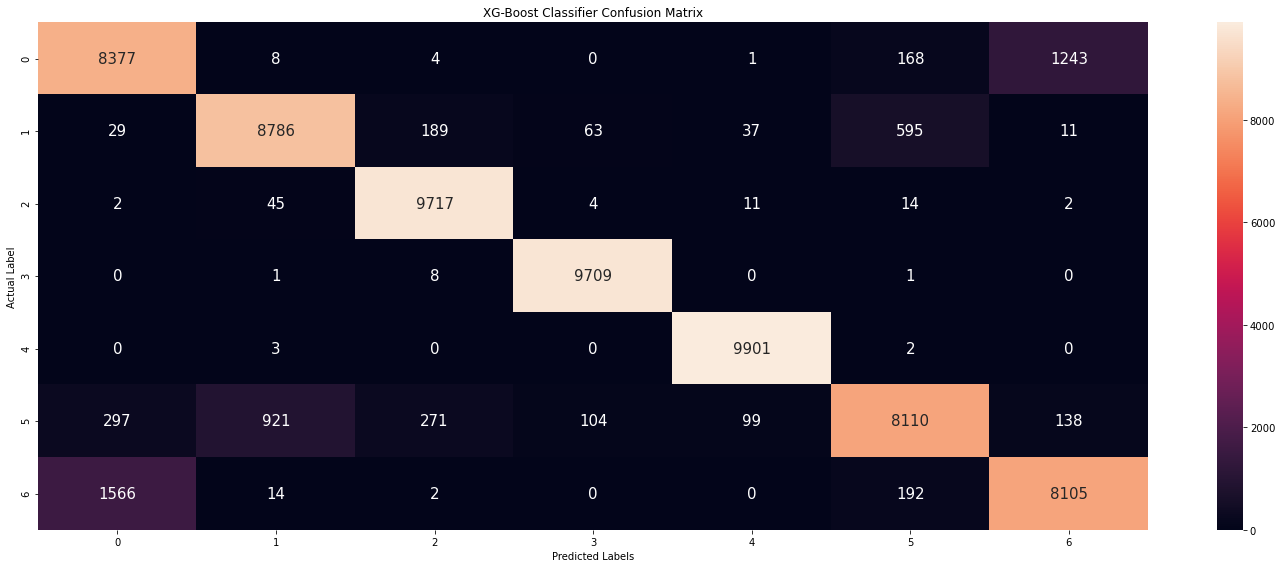

XG-Boost Classifier Scores: {'Accuracy Score': 0.9121, 'Micro F1 Score': 0.9121, 'Macro F1 Score': 0.9116, 'Weighted F1 Score': 0.9114, 'Micro Precision Score': 0.9121, 'Macro Precision Score': 0.9117, 'Weighted Precision Score': 0.9116, 'Micro Recall Score': 0.9121, 'Macro Recall Score': 0.9123, 'Weighted Recall Score': 0.9121, 'Run Time(secs)': 33.689}
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      9801
           1       0.81      0.86      0.84      9710
           2       0.88      0.94      0.91      9795
           3       0.89      0.98      0.93      9719
           4       0.88      0.97      0.92      9906
           5       0.71      0.72      0.72      9940
           6       0.55      0.32      0.40      9879

    accuracy                           0.77     68750
   macro avg       0.75      0.77      0.75     68750
weighted avg       0.75      0.77      0.75     68750
 
 



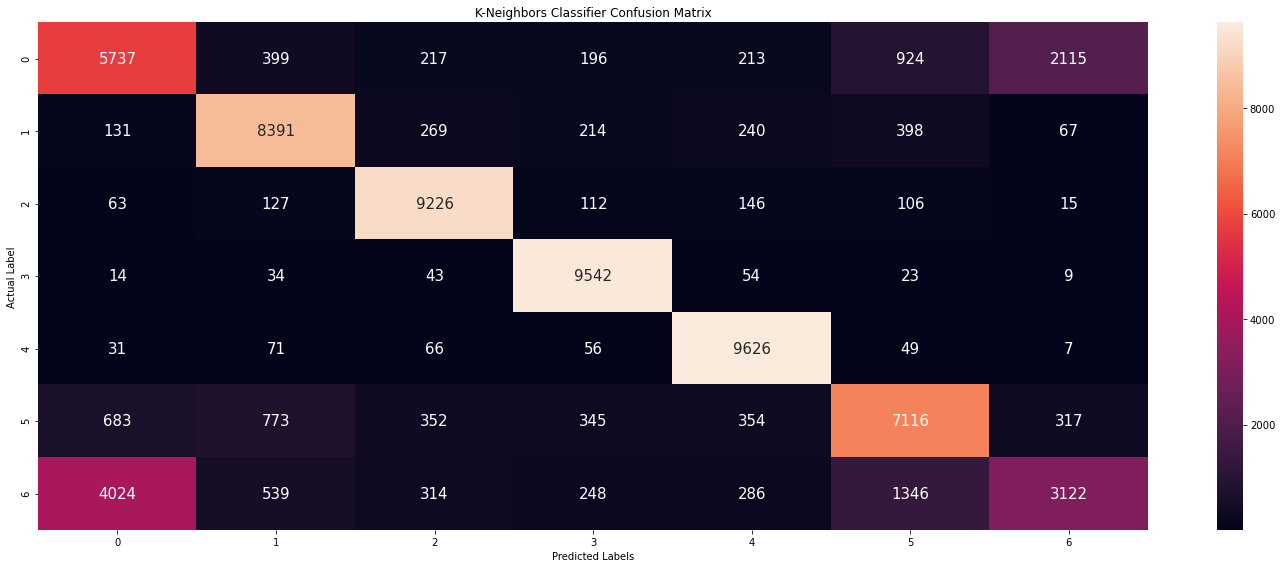

K-Neighbors Classifier Scores: {'Accuracy Score': 0.7674, 'Micro F1 Score': 0.7674, 'Macro F1 Score': 0.7547, 'Weighted F1 Score': 0.7541, 'Micro Precision Score': 0.7674, 'Macro Precision Score': 0.7525, 'Weighted Precision Score': 0.7522, 'Micro Recall Score': 0.7674, 'Macro Recall Score': 0.7681, 'Weighted Recall Score': 0.7674, 'Run Time(secs)': 2.704}
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      9801
           1       0.99      0.99      0.99      9710
           2       1.00      1.00      1.00      9795
           3       1.00      1.00      1.00      9719
           4       1.00      1.00      1.00      9906
           5       0.96      0.94      0.95      9940
           6       0.87      0.77      0.81      9879

    accuracy                           0.94     68750
   macro avg       0.94      0.94      0.94     68750
weighted avg       0.94      0.94      0.94     68750
 
 



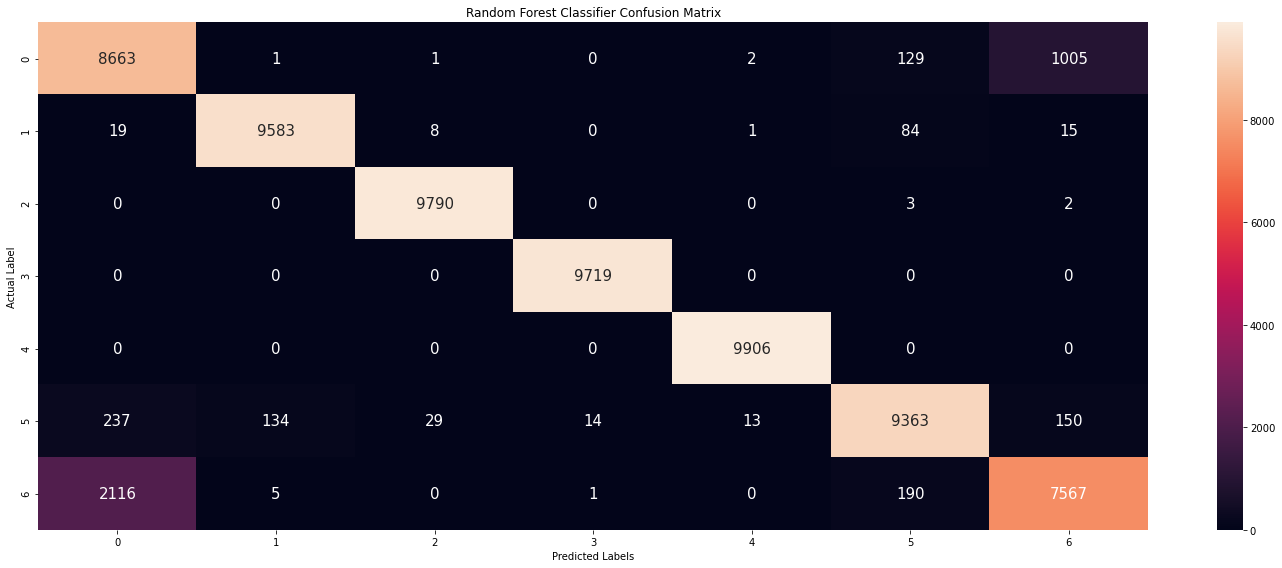

Random Forest Classifier Scores: {'Accuracy Score': 0.9395, 'Micro F1 Score': 0.9395, 'Macro F1 Score': 0.9396, 'Weighted F1 Score': 0.9394, 'Micro Precision Score': 0.9395, 'Macro Precision Score': 0.9411, 'Weighted Precision Score': 0.941, 'Micro Recall Score': 0.9395, 'Macro Recall Score': 0.9397, 'Weighted Recall Score': 0.9395, 'Run Time(secs)': 8.912}


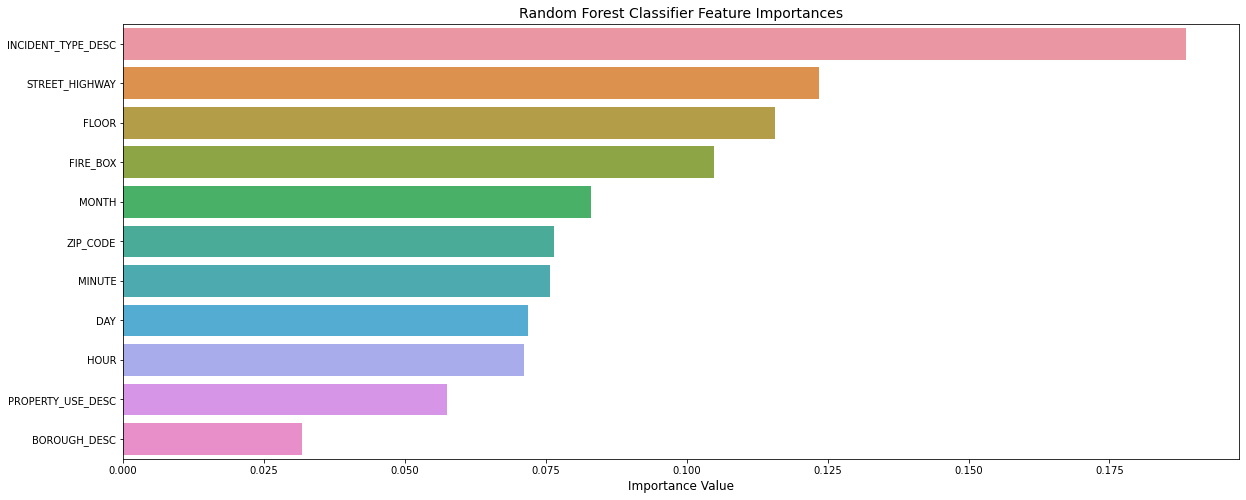

                          Decision Tree Classifier  \
Accuracy Score                              0.8965   
Micro F1 Score                              0.8965   
Macro F1 Score                              0.8961   
Weighted F1 Score                           0.8958   
Micro Precision Score                       0.8965   
Macro Precision Score                       0.8956   
Weighted Precision Score                    0.8955   
Micro Recall Score                          0.8965   
Macro Recall Score                          0.8968   
Weighted Recall Score                       0.8965   
Run Time(secs)                              2.4950   

                          Gradient Boosting Classifier  XG-Boost Classifier  \
Accuracy Score                                  0.5138               0.9121   
Micro F1 Score                                  0.5138               0.9121   
Macro F1 Score                                  0.4968               0.9116   
Weighted F1 Score                  

In [12]:
medium = pd.read_csv('medium_df_s.csv', index_col=0)
medium_features = medium.loc[:, medium.columns != 'HIGHEST_LEVEL_DESC']
medium_target = medium.loc[:, 'HIGHEST_LEVEL_DESC']
medium_results = train_models(medium_features, medium_target, False)


In [16]:
medium_results

,Decision Tree Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier,Random Forest Classifier
Accuracy Score,0.8965,0.5138,0.9121,0.7674,0.9395
Micro F1 Score,0.8965,0.5138,0.9121,0.7674,0.9395
Macro F1 Score,0.8961,0.4968,0.9116,0.7547,0.9396
Weighted F1 Score,0.8958,0.4968,0.9114,0.7541,0.9394
Micro Precision Score,0.8965,0.5138,0.9121,0.7674,0.9395
Macro Precision Score,0.8956,0.5108,0.9117,0.7525,0.9411
Weighted Precision Score,0.8955,0.5112,0.9116,0.7522,0.9410
Micro Recall Score,0.8965,0.5138,0.9121,0.7674,0.9395
Macro Recall Score,0.8968,0.5140,0.9123,0.7681,0.9397
Weighted Recall Score,0.8965,0.5138,0.9121,0.7674,0.9395


              precision    recall  f1-score   support

           0       0.21      0.50      0.30     51731
           1       0.16      0.91      0.27       603
           2       0.16      0.90      0.27       125
           3       0.18      0.82      0.30        44
           4       0.09      0.86      0.16        44
           5       0.31      0.84      0.46      8379
           6       0.94      0.77      0.84    481995

    accuracy                           0.74    542921
   macro avg       0.29      0.80      0.37    542921
weighted avg       0.86      0.74      0.79    542921
 
 



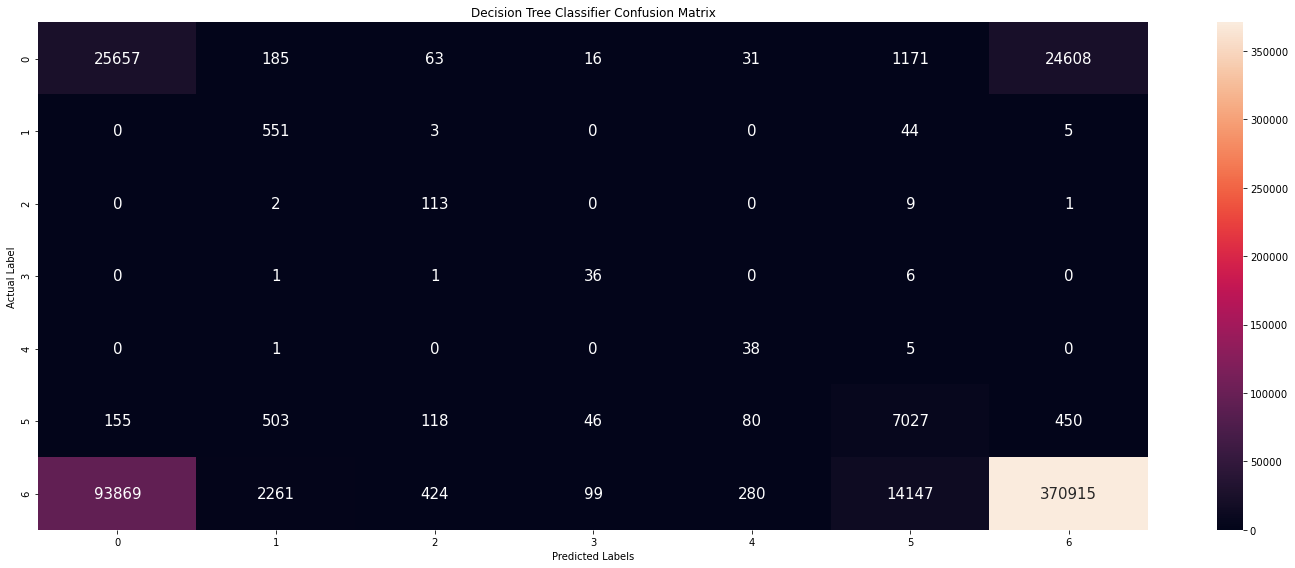

              precision    recall  f1-score   support

           0       0.23      0.58      0.33     51731
           1       0.71      0.98      0.82       603
           2       0.78      0.99      0.88       125
           3       0.72      0.93      0.81        44
           4       0.52      1.00      0.68        44
           5       0.45      0.95      0.61      8379
           6       0.95      0.77      0.85    481995

    accuracy                           0.76    542921
   macro avg       0.62      0.89      0.71    542921
weighted avg       0.87      0.76      0.80    542921
 
 



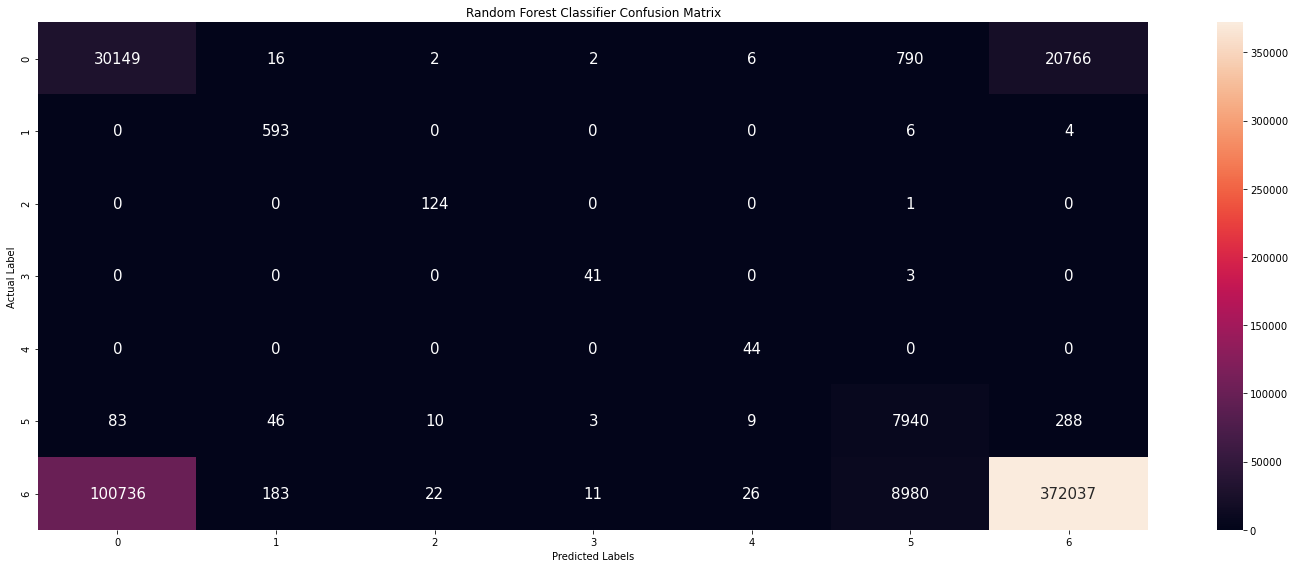

              precision    recall  f1-score   support

           0       0.18      0.81      0.29     51731
           1       0.06      0.27      0.10       603
           2       0.02      0.27      0.04       125
           3       0.01      0.52      0.01        44
           4       0.01      0.59      0.01        44
           5       0.39      0.29      0.33      8379
           6       0.97      0.58      0.72    481995

    accuracy                           0.60    542921
   macro avg       0.23      0.48      0.22    542921
weighted avg       0.88      0.60      0.68    542921
 
 



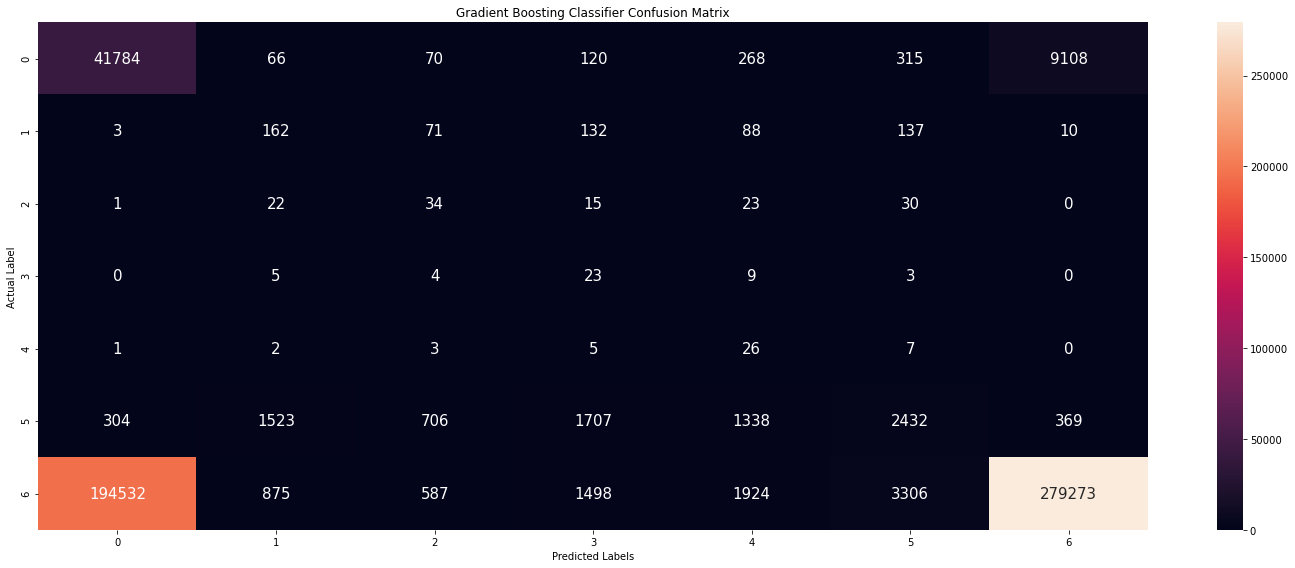

              precision    recall  f1-score   support

           0       0.22      0.41      0.28     51731
           1       0.32      0.82      0.46       603
           2       0.33      0.94      0.49       125
           3       0.30      0.95      0.46        44
           4       0.22      1.00      0.37        44
           5       0.42      0.85      0.57      8379
           6       0.93      0.82      0.87    481995

    accuracy                           0.78    542921
   macro avg       0.39      0.83      0.50    542921
weighted avg       0.85      0.78      0.81    542921
 
 



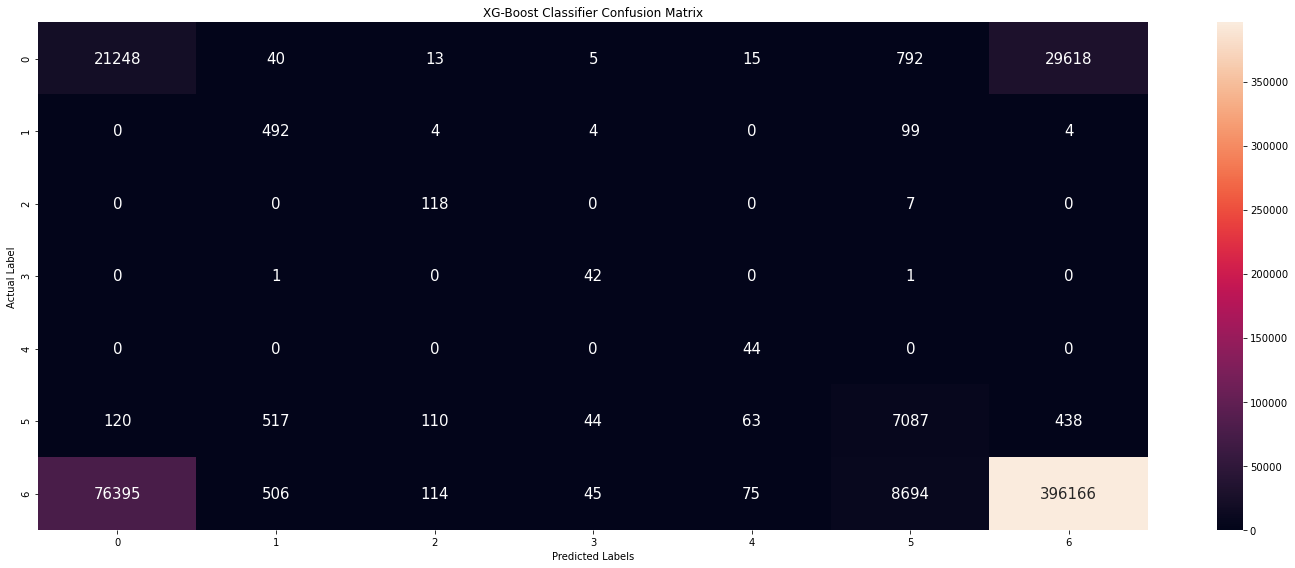

              precision    recall  f1-score   support

           0       0.12      0.54      0.20     51731
           1       0.02      0.97      0.04       603
           2       0.01      1.00      0.01       125
           3       0.00      1.00      0.01        44
           4       0.00      1.00      0.01        44
           5       0.08      0.70      0.14      8379
           6       0.93      0.31      0.47    481995

    accuracy                           0.34    542921
   macro avg       0.17      0.79      0.12    542921
weighted avg       0.84      0.34      0.44    542921
 
 



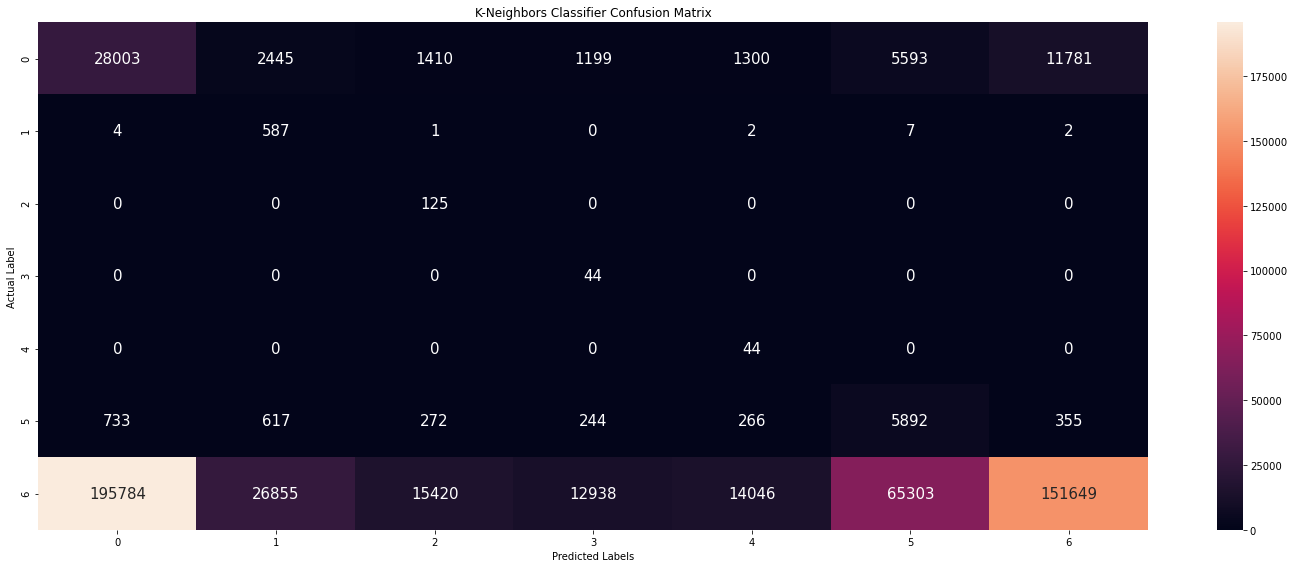

,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier
Accuracy Score,0.7447,0.7569,0.5963,0.7832,0.3432
Micro F1 Score,0.7447,0.7569,0.5963,0.7832,0.3432
Macro F1 Score,0.3708,0.7117,0.2166,0.4982,0.1249
Weighted F1 Score,0.7861,0.7969,0.6762,0.8110,0.4385
Micro Precision Score,0.7447,0.7569,0.5963,0.7832,0.3432
Macro Precision Score,0.2928,0.6220,0.2331,0.3914,0.1657
Weighted Precision Score,0.8571,0.8701,0.8815,0.8529,0.8351
Micro Recall Score,0.7447,0.7569,0.5963,0.7832,0.3432
Macro Recall Score,0.8005,0.8871,0.4760,0.8276,0.7904
Weighted Recall Score,0.7447,0.7569,0.5963,0.7832,0.3432


In [13]:
medium_tester = pd.read_csv('medium_df.csv', index_col=0)
medium_features_tester = medium_tester.loc[:, medium_tester.columns != 'HIGHEST_LEVEL_DESC']
medium_target_tester = medium_tester.loc[:, 'HIGHEST_LEVEL_DESC']
medium_results_tester = run_test_df(medium_target_tester, medium_features_tester)
medium_results_tester 

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      9801
           1       0.90      0.94      0.92      9710
           2       0.97      0.99      0.98      9795
           3       0.99      1.00      0.99      9719
           4       0.99      1.00      0.99      9906
           5       0.87      0.82      0.85      9940
           6       0.78      0.76      0.77      9879

    accuracy                           0.89     68750
   macro avg       0.89      0.90      0.89     68750
weighted avg       0.89      0.89      0.89     68750
 
 



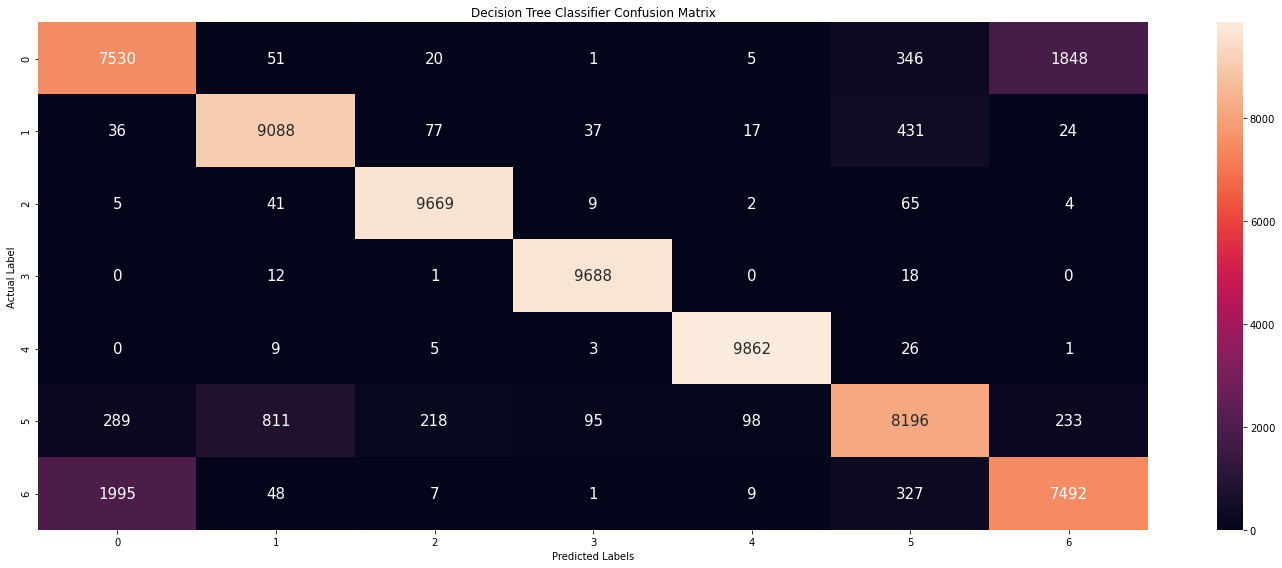

Decision Tree Classifier Scores: {'Accuracy Score': 0.8949, 'Micro F1 Score': 0.8949, 'Macro F1 Score': 0.8944, 'Weighted F1 Score': 0.8942, 'Micro Precision Score': 0.8949, 'Macro Precision Score': 0.894, 'Weighted Precision Score': 0.8938, 'Micro Recall Score': 0.8949, 'Macro Recall Score': 0.8952, 'Weighted Recall Score': 0.8949, 'Run Time(secs)': 2.213}
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      9801
           1       0.33      0.34      0.33      9710
           2       0.42      0.34      0.38      9795
           3       0.42      0.53      0.47      9719
           4       0.46      0.63      0.53      9906
           5       0.46      0.18      0.26      9940
           6       0.80      0.58      0.67      9879

    accuracy                           0.50     68750
   macro avg       0.51      0.50      0.49     68750
weighted avg       0.51      0.50      0.49     68750
 
 



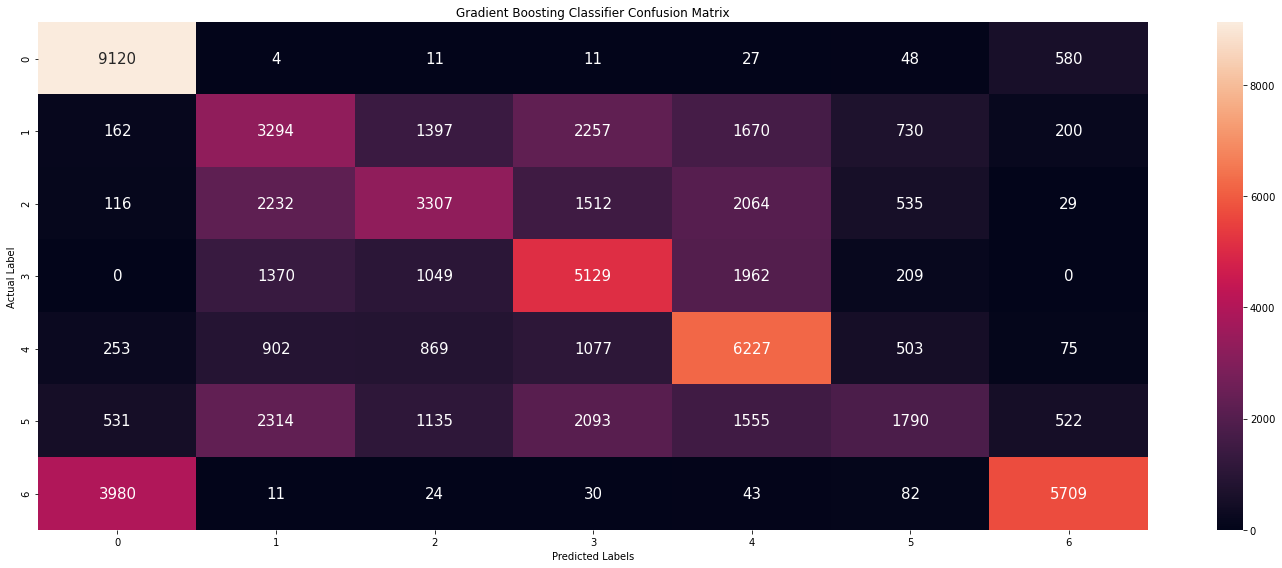

Gradient Boosting Classifier Scores: {'Accuracy Score': 0.5029, 'Micro F1 Score': 0.5029, 'Macro F1 Score': 0.4858, 'Weighted F1 Score': 0.4859, 'Micro Precision Score': 0.5029, 'Macro Precision Score': 0.5055, 'Weighted Precision Score': 0.506, 'Micro Recall Score': 0.5029, 'Macro Recall Score': 0.5031, 'Weighted Recall Score': 0.5029, 'Run Time(secs)': 22.296}
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      9801
           1       0.90      0.90      0.90      9710
           2       0.95      0.99      0.97      9795
           3       0.98      1.00      0.99      9719
           4       0.99      1.00      0.99      9906
           5       0.89      0.81      0.85      9940
           6       0.85      0.81      0.83      9879

    accuracy                           0.91     68750
   macro avg       0.91      0.91      0.91     68750
weighted avg       0.91      0.91      0.91     68750
 
 



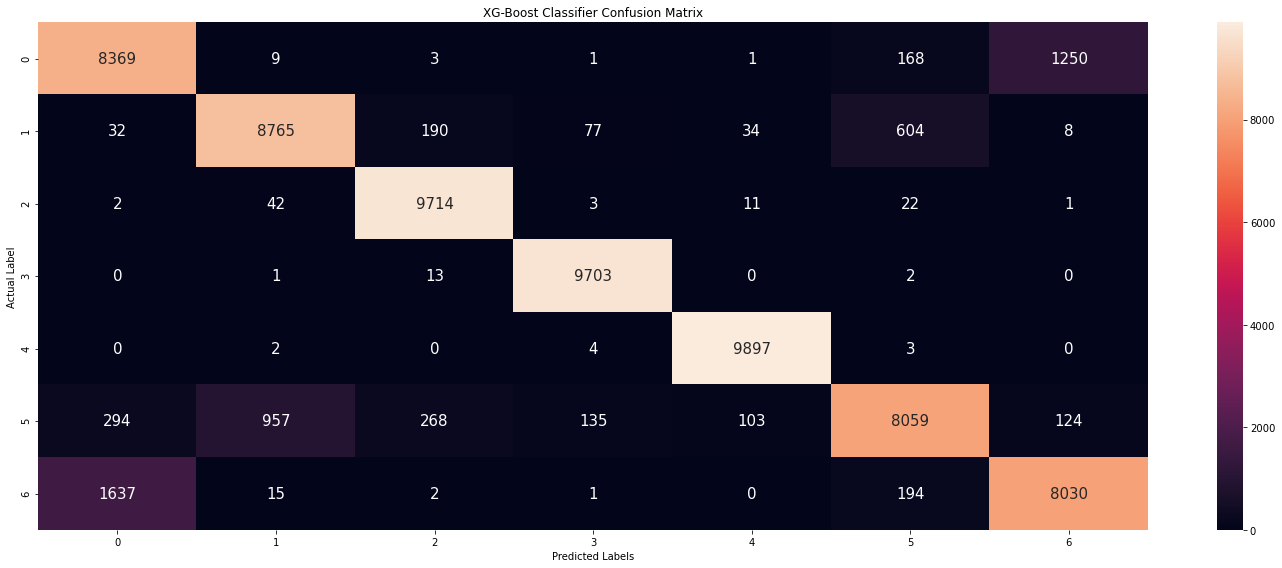

XG-Boost Classifier Scores: {'Accuracy Score': 0.9096, 'Micro F1 Score': 0.9096, 'Macro F1 Score': 0.9091, 'Weighted F1 Score': 0.9089, 'Micro Precision Score': 0.9096, 'Macro Precision Score': 0.9092, 'Weighted Precision Score': 0.9092, 'Micro Recall Score': 0.9096, 'Macro Recall Score': 0.9099, 'Weighted Recall Score': 0.9096, 'Run Time(secs)': 34.353}
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      9801
           1       0.81      0.86      0.84      9710
           2       0.88      0.94      0.91      9795
           3       0.89      0.98      0.93      9719
           4       0.88      0.97      0.92      9906
           5       0.71      0.72      0.72      9940
           6       0.55      0.32      0.40      9879

    accuracy                           0.77     68750
   macro avg       0.75      0.77      0.75     68750
weighted avg       0.75      0.77      0.75     68750
 
 



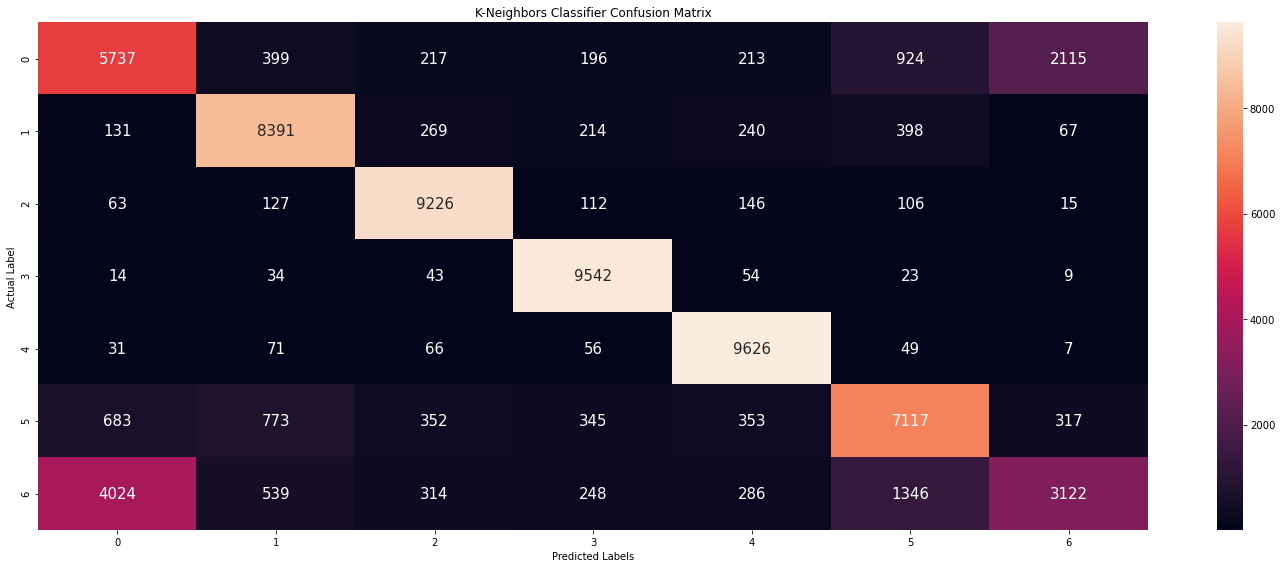

K-Neighbors Classifier Scores: {'Accuracy Score': 0.7674, 'Micro F1 Score': 0.7674, 'Macro F1 Score': 0.7547, 'Weighted F1 Score': 0.7541, 'Micro Precision Score': 0.7674, 'Macro Precision Score': 0.7525, 'Weighted Precision Score': 0.7522, 'Micro Recall Score': 0.7674, 'Macro Recall Score': 0.7681, 'Weighted Recall Score': 0.7674, 'Run Time(secs)': 3.398}
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      9801
           1       0.99      0.99      0.99      9710
           2       1.00      1.00      1.00      9795
           3       1.00      1.00      1.00      9719
           4       1.00      1.00      1.00      9906
           5       0.95      0.94      0.95      9940
           6       0.86      0.77      0.81      9879

    accuracy                           0.94     68750
   macro avg       0.94      0.94      0.94     68750
weighted avg       0.94      0.94      0.94     68750
 
 



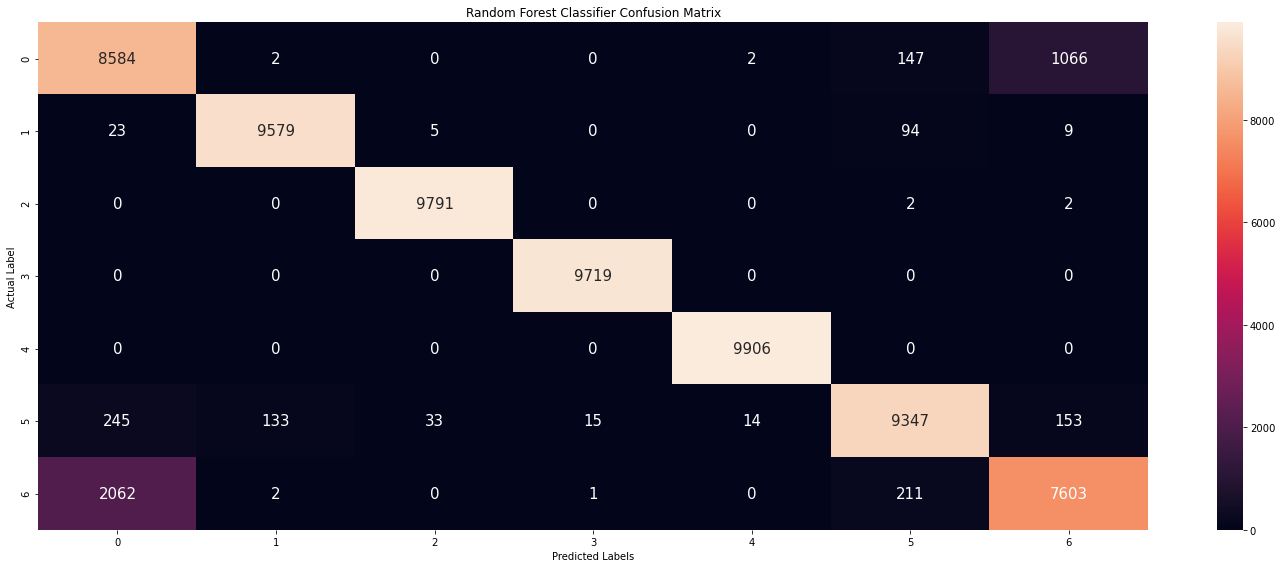

Random Forest Classifier Scores: {'Accuracy Score': 0.9386, 'Micro F1 Score': 0.9386, 'Macro F1 Score': 0.9387, 'Weighted F1 Score': 0.9385, 'Micro Precision Score': 0.9386, 'Macro Precision Score': 0.94, 'Weighted Precision Score': 0.9399, 'Micro Recall Score': 0.9386, 'Macro Recall Score': 0.9388, 'Weighted Recall Score': 0.9386, 'Run Time(secs)': 9.099}


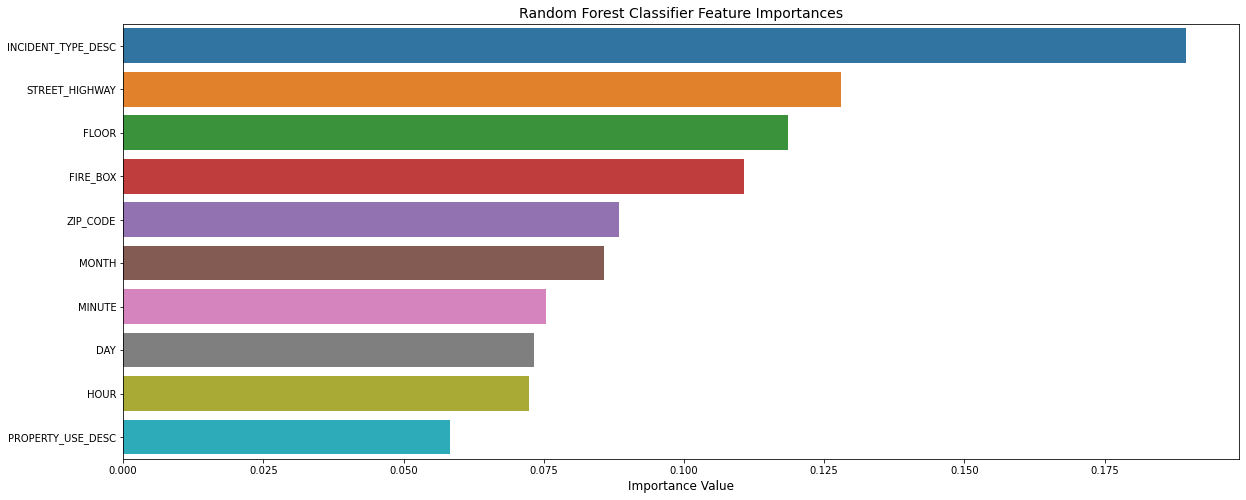

,Decision Tree Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier,Random Forest Classifier
Accuracy Score,0.8949,0.5029,0.9096,0.7674,0.9386
Micro F1 Score,0.8949,0.5029,0.9096,0.7674,0.9386
Macro F1 Score,0.8944,0.4858,0.9091,0.7547,0.9387
Weighted F1 Score,0.8942,0.4859,0.9089,0.7541,0.9385
Micro Precision Score,0.8949,0.5029,0.9096,0.7674,0.9386
Macro Precision Score,0.8940,0.5055,0.9092,0.7525,0.9400
Weighted Precision Score,0.8938,0.5060,0.9092,0.7522,0.9399
Micro Recall Score,0.8949,0.5029,0.9096,0.7674,0.9386
Macro Recall Score,0.8952,0.5031,0.9099,0.7681,0.9388
Weighted Recall Score,0.8949,0.5029,0.9096,0.7674,0.9386


In [14]:
medium_features_removed = medium[['INCIDENT_TYPE_DESC', 'STREET_HIGHWAY', 'FLOOR', 'FIRE_BOX', 'MONTH', 'ZIP_CODE', 'MINUTE', 'DAY', 'HOUR', 'PROPERTY_USE_DESC']]
medium_target_removed = medium.loc[:, 'HIGHEST_LEVEL_DESC']
medium_results_removed = train_models(medium_features_removed, medium_target_removed)
medium_results_removed

              precision    recall  f1-score   support

           0       0.21      0.50      0.30     51731
           1       0.16      0.92      0.27       603
           2       0.15      0.92      0.27       125
           3       0.15      0.82      0.25        44
           4       0.07      0.89      0.13        44
           5       0.31      0.83      0.45      8379
           6       0.94      0.77      0.84    481995

    accuracy                           0.74    542921
   macro avg       0.28      0.81      0.36    542921
weighted avg       0.86      0.74      0.79    542921
 
 



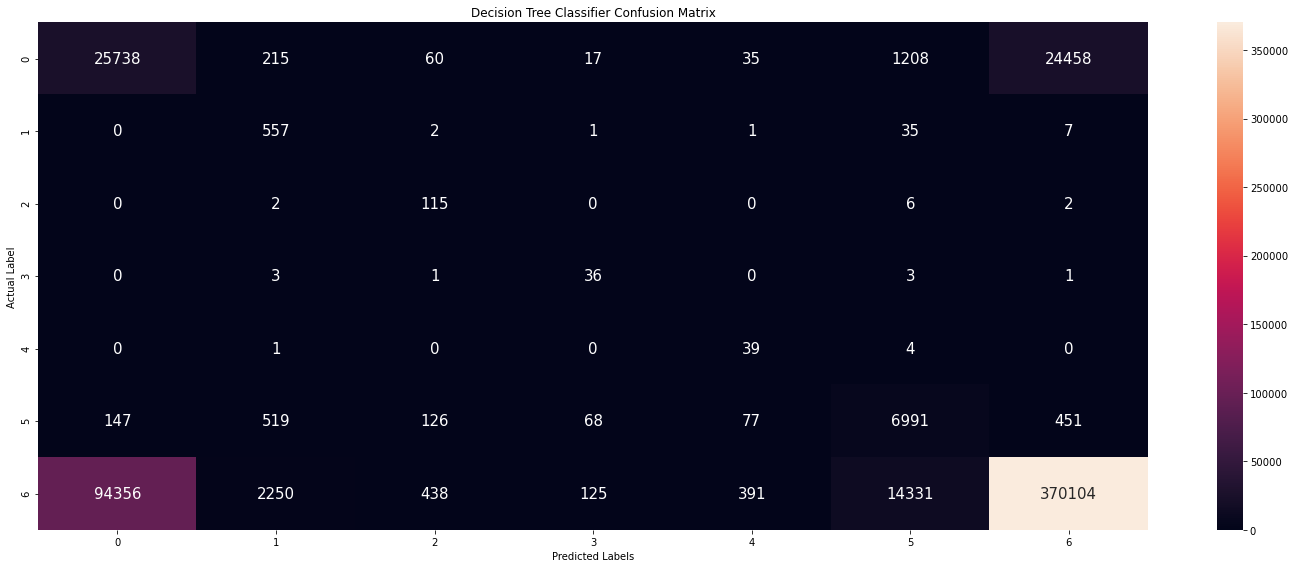

              precision    recall  f1-score   support

           0       0.23      0.57      0.33     51731
           1       0.69      0.99      0.82       603
           2       0.72      1.00      0.84       125
           3       0.66      1.00      0.79        44
           4       0.43      1.00      0.60        44
           5       0.43      0.95      0.60      8379
           6       0.95      0.77      0.85    481995

    accuracy                           0.76    542921
   macro avg       0.59      0.90      0.69    542921
weighted avg       0.87      0.76      0.80    542921
 
 



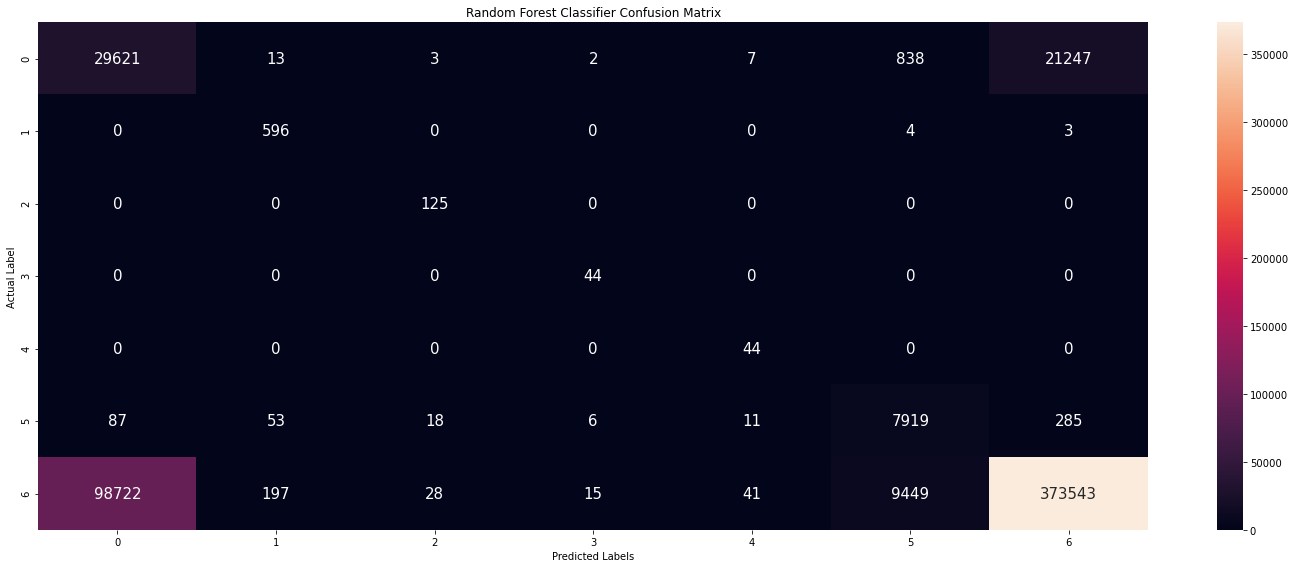

              precision    recall  f1-score   support

           0       0.18      0.81      0.29     51731
           1       0.07      0.28      0.11       603
           2       0.02      0.35      0.04       125
           3       0.01      0.45      0.01        44
           4       0.01      0.59      0.02        44
           5       0.29      0.20      0.24      8379
           6       0.97      0.58      0.73    481995

    accuracy                           0.60    542921
   macro avg       0.22      0.47      0.20    542921
weighted avg       0.88      0.60      0.68    542921
 
 



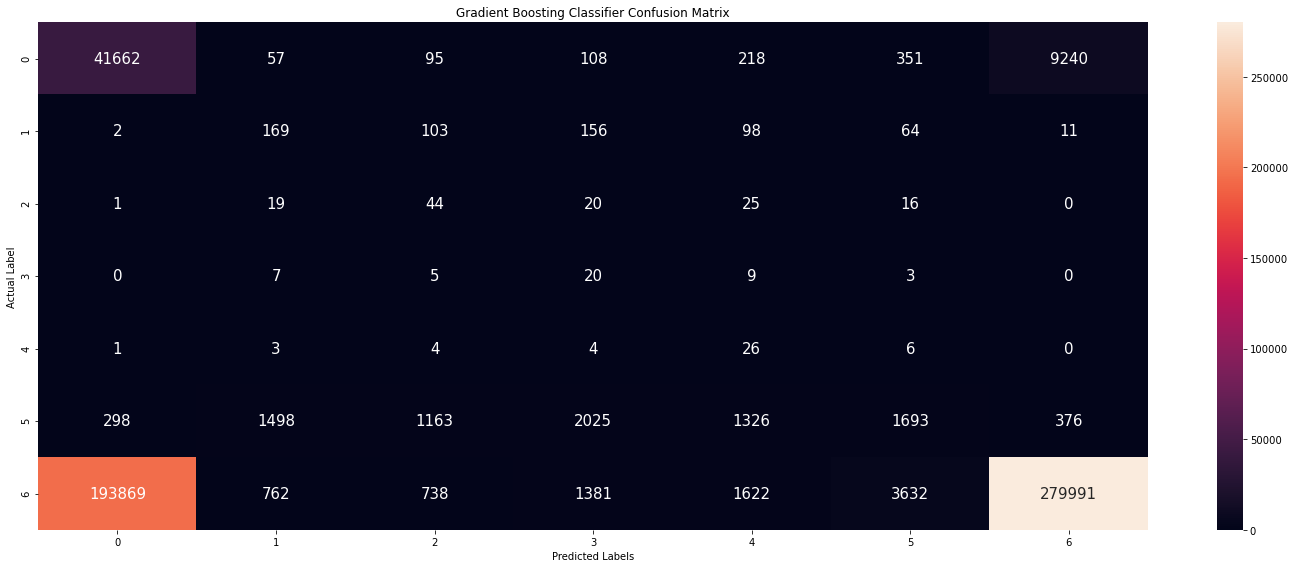

              precision    recall  f1-score   support

           0       0.22      0.42      0.29     51731
           1       0.30      0.83      0.44       603
           2       0.29      0.93      0.44       125
           3       0.26      0.98      0.41        44
           4       0.20      1.00      0.33        44
           5       0.41      0.84      0.55      8379
           6       0.93      0.82      0.87    481995

    accuracy                           0.78    542921
   macro avg       0.37      0.83      0.47    542921
weighted avg       0.85      0.78      0.81    542921
 
 



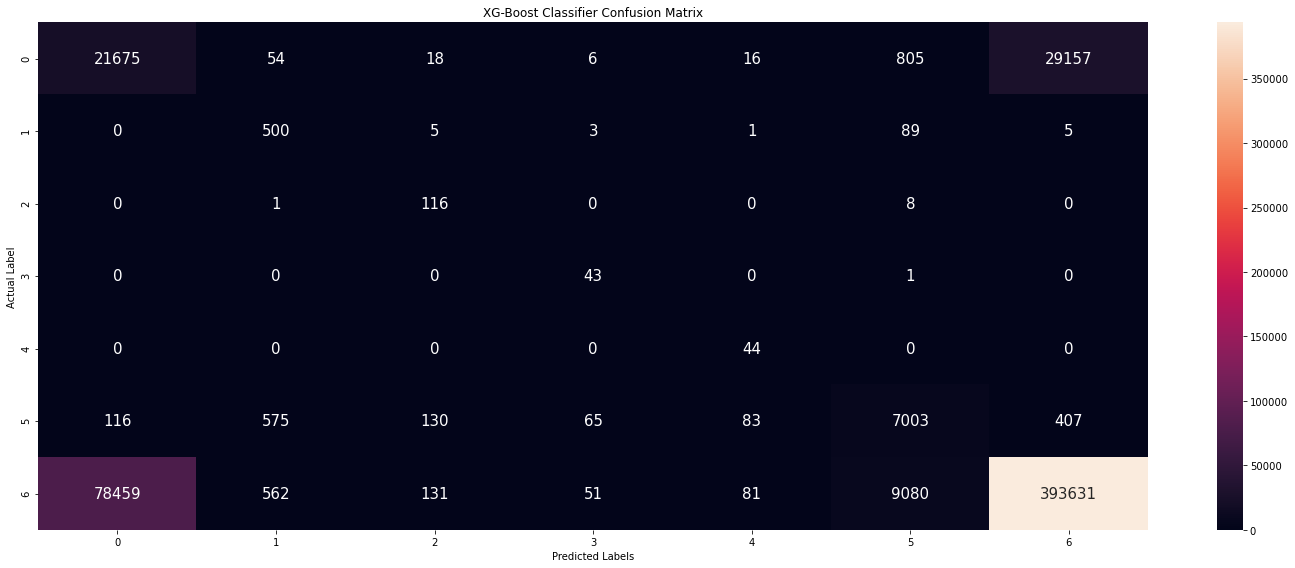

              precision    recall  f1-score   support

           0       0.12      0.54      0.20     51731
           1       0.02      0.97      0.04       603
           2       0.01      1.00      0.01       125
           3       0.00      1.00      0.01        44
           4       0.00      1.00      0.01        44
           5       0.08      0.70      0.14      8379
           6       0.93      0.31      0.47    481995

    accuracy                           0.34    542921
   macro avg       0.17      0.79      0.12    542921
weighted avg       0.84      0.34      0.44    542921
 
 



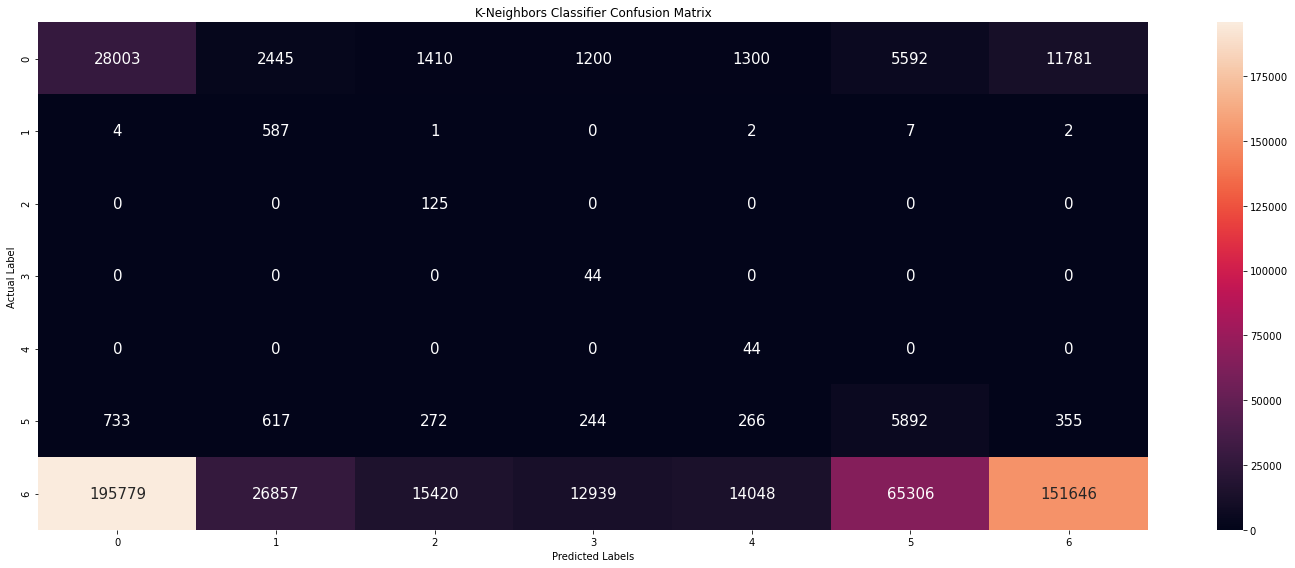

,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier
Accuracy Score,0.7433,0.7587,0.5960,0.7791,0.3432
Micro F1 Score,0.7433,0.7587,0.5960,0.7791,0.3432
Macro F1 Score,0.3584,0.6885,0.2040,0.4739,0.1249
Weighted F1 Score,0.7852,0.7979,0.6757,0.8085,0.4384
Micro Precision Score,0.7433,0.7587,0.5960,0.7791,0.3432
Macro Precision Score,0.2843,0.5867,0.2197,0.3708,0.1657
Weighted Precision Score,0.8572,0.8691,0.8797,0.8531,0.8351
Micro Recall Score,0.7433,0.7587,0.5960,0.7791,0.3432
Macro Recall Score,0.8069,0.8973,0.4666,0.8294,0.7904
Weighted Recall Score,0.7433,0.7587,0.5960,0.7791,0.3432


In [15]:
medium_features_tester_removed = medium_tester[['INCIDENT_TYPE_DESC', 'STREET_HIGHWAY', 'FLOOR', 'FIRE_BOX', 'MONTH', 'ZIP_CODE', 'MINUTE', 'DAY', 'HOUR', 'PROPERTY_USE_DESC']]
medium_target_tester_removed = medium_tester.loc[:, 'HIGHEST_LEVEL_DESC']
medium_results_tester_removed = run_test_df(medium_target_tester_removed, medium_features_tester_removed)
medium_results_tester_removed 